In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [31]:
# loading dataset
df = pd.read_csv('Dataset .csv', encoding='utf-8')
df.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,314
1,162,Makati City,121.014101,14.553708,Japanese,1200,Yes,No,No,3,4.5,591
2,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,270
3,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,4,4.9,365
4,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,4,4.8,229


In [3]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# handling missing values by dropping the rows
df = df.dropna(axis=0)

In [7]:
# checking for columns with special characters

special_char_cols = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str) and any(ord(c) > 127 for c in x)).any():
        special_char_cols.append(col)

print(special_char_cols)

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency']


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
# dropping columns that are irrelevant to our prediction

data = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 
                'Currency', 'Switch to order menu', 'Rating color', 'Rating text'], axis=1)
data.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,314
1,162,Makati City,121.014101,14.553708,Japanese,1200,Yes,No,No,3,4.5,591
2,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,270
3,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,4,4.9,365
4,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,4,4.8,229


In [10]:
# checking for columns with special characters in this new dataframe

sp_char_cols = []
for col in data.columns:
    if data[col].apply(lambda x: isinstance(x, str) and any(ord(c) > 127 for c in x)).any():
        sp_char_cols.append(col)

sp_char_cols

['City', 'Cuisines']

In [11]:
# checking unique values in City column with special characters

def has_special_chars(text):
    return any(ord(char) > 127 for char in str(text))

unique_with_special_chars = data['City'].apply(has_special_chars)

city_unique_values = data.loc[unique_with_special_chars, 'City'].unique()

city_unique_values

array(['Bras�_lia', 'S��o Paulo', '��stanbul'], dtype=object)

In [12]:
# checking unique values in Cuisines column with special characters
def has_special_chars(text):
    return any(ord(char) > 127 for char in str(text))

unique_with_special_chars = data['Cuisines'].apply(has_special_chars)

cuisines_unique_values = data.loc[unique_with_special_chars, 'Cuisines'].unique()

cuisines_unique_values

array(['Kebab, Turkish Pizza, D�_ner', 'Desserts, B�_rek'], dtype=object)

In [13]:
# removing special characters and normalizing text

import unicodedata

def normalize_text(column):
    def normalize_entry(entry):
        if isinstance(entry, str):
            return ''.join(
                c if ord(c) < 128 else unicodedata.normalize('NFKD', c).encode('ascii', 'ignore').decode('utf-8')
                for c in entry.replace('_', ' ')
            ).strip()
        return entry

    return column.apply(normalize_entry)

data['City'] = normalize_text(data['City'])
data['Cuisines'] = normalize_text(data['Cuisines'])

# checking unique values in the cleaned columns to ensure proper cleaning
unique_cities = data['City'].unique()
unique_cuisines = data['Cuisines'].unique()

unique_cities, unique_cuisines[:5] 

(array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
        'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
        'Taguig City', 'Bras lia', 'Rio de Janeiro', 'So Paulo', 'Albany',
        'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
        'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
        'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
        'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
        'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
        'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
        'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
        'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
        'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
        'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
        'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East

In [14]:
# correcting the city and cuisines column using mapping

city_mapping = {
    'Bras lia': 'Brasilia',
    'So Paulo': 'Sao Paulo',
    'stanbul': 'Istanbul'
}

cuisines_mapping = {
    'Kebab, Turkish Pizza, D ner': 'Kebab, Turkish Pizza, Doner',
    'Desserts, B rek': 'Desserts, Borek'
}

data['City'] = data['City'].replace(city_mapping)
data['Cuisines'] = data['Cuisines'].replace(cuisines_mapping)

# checking unique values after mapping
mapped_cities = data['City'].unique()
mapped_cuisines = data['Cuisines'].unique()

mapped_cities, mapped_cuisines[:5]

(array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
        'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
        'Taguig City', 'Brasilia', 'Rio de Janeiro', 'Sao Paulo', 'Albany',
        'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
        'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
        'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
        'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
        'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
        'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
        'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
        'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
        'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
        'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
        'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham Eas

In [15]:
data.tail()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
9546,208,Istanbul,28.977392,41.022793,Turkish,80,No,No,No,3,4.1,788
9547,208,Istanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,3,4.2,1034
9548,208,Istanbul,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,4,3.7,661
9549,208,Istanbul,29.036019,41.057979,Restaurant Cafe,120,No,No,No,4,4.0,901
9550,208,Istanbul,29.026016,40.984776,Cafe,55,No,No,No,2,4.0,591


In [16]:
# checking for missing values
data.isnull().sum()

Country Code            0
City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

In [17]:
# checking to ensure we have no more special characters
sp_char_cols = []
for col in data.columns:
    if data[col].apply(lambda x: isinstance(x, str) and any(ord(c) > 127 for c in x)).any():
        sp_char_cols.append(col)

sp_char_cols

[]

In [18]:
data.to_csv('New Dataset.csv', index=False)

# Observations

##### 1. The data had missing values which I handled by dropping the rows with missing values since they are few and will not significantly affect our prediction.

##### 2. I checked for columns with special characters and removed them since they are not relevant to our prediction.

##### 3. The city and cuisines are relevant to our prediction so I cleaned them by removing special characters and normalizing the text. Then went on to map the unique values to ensure consistency in our data.

##### 4. Saved the cleaned data to a new csv file for future purposes.

##### Now we have our clean dataset, we will now proceed to other steps like encoding categorical data, train test split, feature scaling, model training and model evaluation

In [19]:
# encoding categorical data using label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])
data['Cuisines'] = le.fit_transform(data['Cuisines'])
data['Has Table booking'] = le.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = le.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = le.fit_transform(data['Is delivering now'])
data.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,162,74,121.027535,14.565443,920,1100,1,0,0,3,4.8,314
1,162,74,121.014101,14.553708,1111,1200,1,0,0,3,4.5,591
2,162,76,121.056831,14.581404,1671,4000,1,0,0,4,4.4,270
3,162,76,121.056475,14.585318,1126,1500,0,0,0,4,4.9,365
4,162,76,121.057508,14.584450,1122,1500,1,0,0,4,4.8,229


In [20]:
# feature seperation

x = data.drop('Aggregate rating', axis=1).values
y = data['Aggregate rating']

In [21]:
# train test split and feature scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
# training our model
# linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
# model evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

1.5221281450416546
0.33532456692774304


#### Given that the R2 score is 0.33, which is relatively low, we can conclude that the linear regression model is not a good fit for our data. Let's try the random forest regression model.

In [24]:
# using Random forest regression model

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print(mse_rf)
print(r2_rf)

0.08787585646935567
0.9616268031403059


#### Given that the R2 score is 0.96, which is relatively high, we can conclude that the random forest regression model is a good fit for our data. 

# Interpretation of model's result

#### Mean Squared Error (MSE) is 0.087 which measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, the MSE is quite low, suggesting that our model's predictions are close to the actual values.

#### R2 Score is 0.96 which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates a better fit of the model to the data. In this case, the R2 score is very high, suggesting that our model is able to explain a large proportion of the variance in the data which is excellent.

In [25]:
# analyzing the most influential features

features = ['Country Code', 'City', 'Longitude', 'Latitude', 'Cuisines',
            'Average Cost for two', 'Has Table booking', 'Has Online delivery',
            'Is delivering now', 'Price range', 'Votes']

importance = rf_model.feature_importances_

if len(features) == len(importance):
    influential_features = pd.DataFrame({'Feature': features, 'Importance': importance})
    print(influential_features.sort_values(by='Importance', ascending=False))
else:
    print("Feature names and importances do not align.")

                 Feature  Importance
10                 Votes    0.947453
2              Longitude    0.015396
3               Latitude    0.011969
4               Cuisines    0.010458
5   Average Cost for two    0.006342
0           Country Code    0.003829
1                   City    0.001916
7    Has Online delivery    0.001095
9            Price range    0.000899
6      Has Table booking    0.000525
8      Is delivering now    0.000118


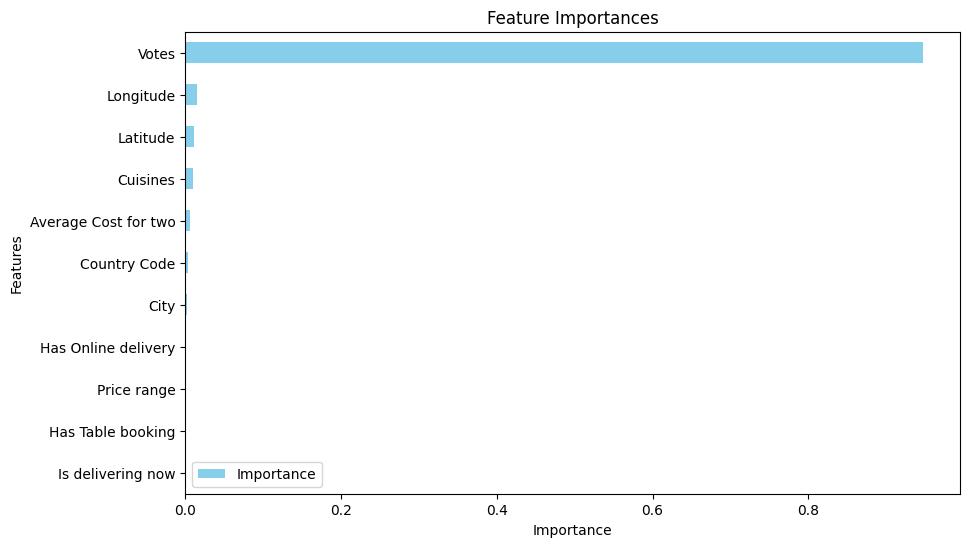

In [26]:
# plotting the feature importances
influential_features.sort_values(by='Importance', ascending=True).plot(
    kind='barh', x='Feature', y='Importance', figsize=(10, 6), color='skyblue'
)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Insights

#### Votes: This feature stands out with the highest importance, close to 1.0, indicating it has the most significant impact on the model's predictions.

#### Longitude and Latitude: These geographical features have the next highest importance, though much lower than Votes.

#### Cuisines and Average Cost for two: These features have moderate importance, contributing to the model's predictions but not as much as Votes.

#### Country Code and City: These location-based features have minimal impact on the model.

#### Has Online delivery, Price range, Has Table booking, and Is delivering now: These features have negligible importance, indicating they have little to no influence on the model's predictions.
